<a href="https://colab.research.google.com/github/ZahraEk/Speech/blob/main/EX3_Q2_b_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install package dtw

In [1]:
!pip install dtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5314 sha256=d6cb3ed502734edcbcf3e8a089e13acf277d1d42eb3b047d9f8807d0e48ccc5d
  Stored in directory: /root/.cache/pip/wheels/5b/cc/44/62f60769f89e834ab2124c69de4005c771e0ff06af908bbbf3
Successfully built dtw


import Required libraries

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from dtw import dtw
from numpy.linalg import norm
import cv2 as cv

FCA for OA & OB :

Normalized distance between
FCA_OA & FAC_OA : 9871.107543945312
FCA_OA & FBH_OA : 8456.741523742676
FCA_OB & FAC_OB : 7334.294380187988
FCA_OB & FBH_OB : 9341.93295288086


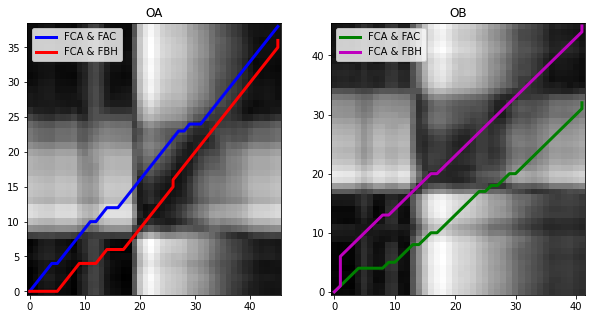

In [18]:
#load wave files [OA]
ytest, srtest = librosa.load('drive/MyDrive/clean Digits/FCA_OA.wav')
y1, sr1 = librosa.load('drive/MyDrive/clean Digits/FAC_OA.wav')
y2, sr2 = librosa.load('drive/MyDrive/clean Digits/FBH_OA.wav')

#load wave files [OB]
ytest2, srtest2 = librosa.load('drive/MyDrive/clean Digits/FCA_OB.wav')
y3, sr3 = librosa.load('drive/MyDrive/clean Digits/FAC_OB.wav')
y4, sr4 = librosa.load('drive/MyDrive/clean Digits/FBH_OB.wav')

#compute mfccs
mfcc_test = librosa.feature.mfcc(ytest, srtest)
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

mfcc_test2 = librosa.feature.mfcc(ytest2, srtest2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfcc4 = librosa.feature.mfcc(y4, sr4)

#compute dtw 
dist1, cost1, acc_cost1, path1 = dtw(mfcc_test.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
dist2, cost2, acc_cost2, path2 = dtw(mfcc_test.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
dist3, cost3, acc_cost3, path3 = dtw(mfcc_test2.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
dist4, cost4, acc_cost4, path4 = dtw(mfcc_test2.T, mfcc4.T, dist=lambda x, y: norm(x - y, ord=1))

print ('Normalized distance between')
print ('FCA_OA & FAC_OA :', dist1)
print ('FCA_OA & FBH_OA :', dist2)
print ('FCA_OB & FAC_OB :', dist3)
print ('FCA_OB & FBH_OB :', dist4)

#display dtw
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path1[0], path1[1], 'b', label="FCA & FAC", linewidth=3)

ax[0].imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[0].plot(path2[0], path2[1], 'r', label="FCA & FBH", linewidth=3)

ax[1].imshow(cost3.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path3[0], path3[1], 'g', label="FCA & FAC", linewidth=3)

ax[1].imshow(cost4.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
ax[1].plot(path4[0], path4[1], 'm', label="FCA & FBH", linewidth=3)

ax[0].set_title("OA")
ax[1].set_title("OB")
ax[0].legend()
ax[1].legend()

#write mormalized distances in file
with open('drive/MyDrive/EX3/EX3_Q2_b/FCA_O.txt', 'w') as f:
    f.write("Normalized distances :\n")
    f.write("[OA]\n")
    f.write('FCA & FAC : ')
    f.write(str(dist1))
    f.write('\nFCA & FBH : ')
    f.write(str(dist2))
    f.write("\n[OB]\n")
    f.write('FCA & FAC : ')
    f.write(str(dist3))
    f.write('\nFCA & FBH : ')
    f.write(str(dist4))   

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q2_b/FCA_O.jpg')